# CS170 Project Notebook

### Imports

In [1]:
import networkx as nx
from parse import read_input_file, write_input_file, write_output_file, read_output_file
from utils import is_valid_network, average_pairwise_distance, average_pairwise_distance_fast
import sys

import matplotlib.pyplot as plt
%matplotlib inline
import random

import solver
from solver import EmployedBee

## Generate Inputs

In [2]:
def randomNGraph(n: int):
    temp = nx.generators.random_graphs.erdos_renyi_graph(n, 5/n)
    while not nx.is_connected(temp):
        temp = nx.generators.random_graphs.erdos_renyi_graph(n, 5/n)

    for (u, v) in temp.edges():
        temp.edges[u, v]['weight'] = round(random.uniform(1/n, n), 2)
    return temp


## Create input files

In [3]:
G25 = randomNGraph(25)
G50 = randomNGraph(50)
G100 = randomNGraph(100)

In [4]:
write_input_file(G25, "./25.in")
write_input_file(G50, "./50.in")
write_input_file(G100, "./100.in")

## Algorithm

### Artificial Bee Colony Algorithms

- Initialisation
   - Each scout bee generates a random connected dominating tree and becomes employed bee. 

- Iteration
   - Each employed bee calls `find_neighbor` to try to find a solution toward its local optimum. 
   - Each onlooker bee randomly chooses two employed bee and choose the bee whose solution has lower cost. The one chosen is called `find_neighbor` again.  
   - If an employed bee solution is not improved over time (e.g. 10 times or so), fire the bee (let the bee find a new solution from scratch). 

- Final Decision
   - Choose an employed bee with lower cost. 

In [2]:
def cost(T, G):
    assert(is_valid_network(G, T))
    if len(T) == 1:
        return 0
    return average_pairwise_distance_fast(T)

#### Unit Tests: Test if `random_dominating_tree` (scout) is valid

In [8]:
def testRandomDominatingTree(iterations: int, sub_iterations: int):
    for i in range(iterations):
        r = randomNGraph(100)
        costs = []
        for _ in range(sub_iterations):
            rd = solver.randomDominatingTree(r)
            assert(is_valid_network(r, rd))
            costs.append(round(average_pairwise_distance_fast(rd), 2))
        print("At iteration %d: Initial Costs: %s" % (i, str(costs)))
    print("TEST PASSED: All results are valid network. ")


### Unit Tests: Test the ABC Algorithm and parameter

In [9]:
def TestABC(test_iter: int, n_employed: int, n_onlooker: int, n_iter: int, fire_limit: int):
    cost_ratio_mst:List[float] = []
    cost_ratio_single:List[float] = []

    for i in range(test_iter):
        f = random.randint(1, 303)
        print("TEST SUITE %d" % f)
        G = read_input_file("./inputs/large-%d.in" % f)
        # test ABC
        print("Running ABC")
        T = solver.ABC(G, n_employed, n_onlooker, n_iter, fire_limit, log=True)
        # test single intelligent observer
        print("Running Single Observer")
        single_cost = []
        for _ in range(n_employed):
            bee = EmployedBee(G)
            for _ in range(n_iter):
                bee.work()
                if len(bee.solution) == 1:
                    break
            single_cost.append(cost(bee.solution, G))
        bee = EmployedBee(G)
        # test naive MST
        print("Running MST")
        mst = nx.minimum_spanning_tree(G)
        
        mst_cost, bee_cost, T_cost = cost(mst, G), min(single_cost), cost(T, G)
        print("Cost of MST is %f" % mst_cost)
        print("Cost of single observer is %f" % bee_cost)
        print("Cost of ABC is %f" % T_cost)

        if (bee_cost == 0):
            bee_cost = 1e-99
        if (mst_cost == 0):
            mst_cost = 1e-99
        cost_ratio_mst.append(T_cost / mst_cost)
        cost_ratio_single.append(T_cost / bee_cost)
        print("============================")

    print("Average cost ratio to MST is %f" % (sum(cost_ratio_mst) / len(cost_ratio_mst)))
    print("Average cost ratio to Single observer is %f" % (sum(cost_ratio_single) / len(cost_ratio_single)))

In [10]:
TestABC(10, 15, 3, 1400, 100)

TEST SUITE 178
Running ABC
At iteration 0, the best cost is 3.294384, 15 scouts are called
At iteration 100, the best cost is 2.027273, 15 scouts are called
At iteration 200, the best cost is 1.827778, 30 scouts are called
At iteration 300, the best cost is 1.827778, 45 scouts are called
At iteration 400, the best cost is 1.827778, 59 scouts are called
At iteration 500, the best cost is 1.827778, 63 scouts are called
At iteration 600, the best cost is 1.827778, 75 scouts are called
At iteration 700, the best cost is 1.827778, 90 scouts are called
At iteration 800, the best cost is 1.827778, 105 scouts are called
At iteration 900, the best cost is 1.827778, 116 scouts are called
At iteration 1000, the best cost is 1.827778, 124 scouts are called
At iteration 1100, the best cost is 1.827778, 135 scouts are called
At iteration 1200, the best cost is 1.800000, 149 scouts are called
At iteration 1300, the best cost is 1.790909, 163 scouts are called
Running Single Observer
Running MST
Cost 

In [3]:
G = read_input_file("./inputs/large-356.in")

In [4]:
T = solver.ABC(G, 15, 5, 2000, 100, True)
cost(T, G)

Performing constructive exploration. 
constructive exploration found a result! Let's see if ABC found a better one
At iteration 0, the best cost is 16.001042, 15 scouts are called
At iteration 100, the best cost is 12.051615, 15 scouts are called
At iteration 200, the best cost is 11.386738, 15 scouts are called
At iteration 300, the best cost is 11.386738, 27 scouts are called
At iteration 400, the best cost is 11.386738, 30 scouts are called
At iteration 500, the best cost is 11.386738, 31 scouts are called
At iteration 600, the best cost is 11.386738, 40 scouts are called
At iteration 700, the best cost is 11.386738, 45 scouts are called
At iteration 800, the best cost is 11.386738, 49 scouts are called
At iteration 900, the best cost is 11.386738, 53 scouts are called
At iteration 1000, the best cost is 11.386738, 60 scouts are called
At iteration 1100, the best cost is 11.386738, 65 scouts are called
At iteration 1200, the best cost is 11.386738, 69 scouts are called
At iteration 

TypeError: cost() missing 1 required positional argument: 'G'

In [44]:
def getCost(fileName: str):
    G = read_input_file("./inputs/%s.in" % fileName)
    T = read_output_file("./outputs/%s.out" % fileName, G)
    
    plt.subplot(221)
    nx.draw_shell(G)
    plt.subplot(224)
    nx.draw_shell(T)

    if len(T) == 1:
        return 0
    return average_pairwise_distance_fast(T)

7.471471471471472

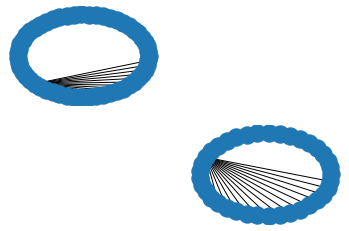

In [45]:
getCost("large-164")

In [20]:
import json

## get online ranking

In [21]:
data = None
with open("rank.json","r") as f:
    data = json.load(f)

In [22]:
for v in data.values():
    v.sort(key = lambda x: x[1])

In [23]:
def getRank(value):
    rank = 1
    for v in value:
        if v[0] == 'Salieri':
            return rank
        rank += 1
    return -1

In [24]:
rankStat = dict()
for k, v in data.items():
    rank = getRank(v)
    if rank in rankStat:
        rankStat[rank].append(k)
    else:
        rankStat[rank] = [k]

In [36]:
def printStat(stat):
    keys = sorted(stat.keys(), reverse = True)
    for key in keys:
        print("%d: \n %s\n" % (key, str(stat[key])))



In [37]:
printStat(rankStat)

53: 
 ['small-254']

50: 
 ['large-107', 'large-111', 'large-115', 'large-123', 'large-2', 'large-229', 'large-249', 'large-280', 'large-29', 'large-292', 'large-296', 'large-298', 'large-303', 'large-62', 'large-69', 'large-71', 'large-74', 'medium-107', 'medium-111', 'medium-123', 'medium-125', 'medium-175', 'medium-2', 'medium-229', 'medium-257', 'medium-280', 'medium-281', 'medium-292', 'medium-296', 'medium-298', 'medium-303', 'medium-62', 'medium-69', 'medium-74', 'medium-96', 'medium-97', 'small-107', 'small-115', 'small-123', 'small-148', 'small-175', 'small-2', 'small-221', 'small-229', 'small-243', 'small-25', 'small-257', 'small-262', 'small-268', 'small-283', 'small-29', 'small-292', 'small-303', 'small-32', 'small-36', 'small-62', 'small-69', 'small-74', 'small-93', 'small-96']

49: 
 ['large-125', 'large-148', 'large-170', 'large-175', 'large-248', 'large-32', 'medium-145', 'medium-245', 'medium-248', 'medium-283', 'medium-33', 'medium-36', 'medium-90', 'small-12', 'small

In [40]:
def getFirst(fraction: float):
    data = None
    with open("rank.json","r") as f:
        data = json.load(f)
    for v in data.values():
        v.sort(key = lambda x: x[1])
    def getRank(value):
        rank = 1
        for v in value:
            if v[0] == 'Salieri':
                return rank
            rank += 1
        return -1
    stat = dict()
    for k, v in data.items():
        rank = getRank(v)
        if rank in stat:
            stat[rank].append(k)
        else:
            stat[rank] = [k]

    keys = sorted(stat.keys(), reverse = True)
    values = []
    for key in keys:
        values.extend(stat[key])
    until = len(values)
    until = min(until - 1, round(until / 3))
    return values[:until]

In [41]:
getFirst(0.3)

['small-254',
 'large-107',
 'large-111',
 'large-115',
 'large-123',
 'large-2',
 'large-229',
 'large-249',
 'large-280',
 'large-29',
 'large-292',
 'large-296',
 'large-298',
 'large-303',
 'large-62',
 'large-69',
 'large-71',
 'large-74',
 'medium-107',
 'medium-111',
 'medium-123',
 'medium-125',
 'medium-175',
 'medium-2',
 'medium-229',
 'medium-257',
 'medium-280',
 'medium-281',
 'medium-292',
 'medium-296',
 'medium-298',
 'medium-303',
 'medium-62',
 'medium-69',
 'medium-74',
 'medium-96',
 'medium-97',
 'small-107',
 'small-115',
 'small-123',
 'small-148',
 'small-175',
 'small-2',
 'small-221',
 'small-229',
 'small-243',
 'small-25',
 'small-257',
 'small-262',
 'small-268',
 'small-283',
 'small-29',
 'small-292',
 'small-303',
 'small-32',
 'small-36',
 'small-62',
 'small-69',
 'small-74',
 'small-93',
 'small-96',
 'large-125',
 'large-148',
 'large-170',
 'large-175',
 'large-248',
 'large-32',
 'medium-145',
 'medium-245',
 'medium-248',
 'medium-283',
 'medium-